# AmadeusGPT Demo: Elevated Plus Maze

- please get an openAI user key: https://platform.openai.com/api-keys.
- We suggest to run the demos locally, but it can be viewed on Google Colab. Some interactive features might not be available.

In [ ]:
!pip install --pre amadeusgpt

- Let's test that your open AI API Key works:

In [2]:
mykey = "your-key-here"

In [3]:
from openai import OpenAI

client = OpenAI(api_key=mykey)

response = client.chat.completions.create(
    model="gpt-4",
    messages=[{"role": "user", "content": "Hello"}]
)
print(response.choices[0].message.content)

Hello! How can I assist you today?


In [4]:
import os
if 'OPENAI_API_KEY' not in os.environ:
     os.environ['OPENAI_API_KEY'] = mykey

In [5]:
import amadeusgpt

In [6]:
amadeusgpt.__file__

'/Users/mackenzie/anaconda3/envs/cebra/lib/python3.12/site-packages/amadeusgpt/__init__.py'

In [7]:
%matplotlib widget
from amadeusgpt import AMADEUS
import amadeusgpt
from pathlib import Path
import amadeusgpt
from amadeusgpt.utils import parse_result
from amadeusgpt import create_project

## Please upload the demo video and associated files:
- you can grab it from here: https://github.com/AdaptiveMotorControlLab/AmadeusGPT/tree/mwm/docs/examples/EPM


In [ ]:
from google.colab import files

uploaded = files.upload()
for filepath, content in uploaded.items():
  print(f'User uploaded file "{filepath}" with length {len(content)} bytes')

video_path = Path(filepath).resolve()

- Set the scene number to visualize your video in a specific frame

- 🔥 Make sure your animal(s) are visible on that frame so gpt-4o can configure AmadeusGPT correctly

In [9]:
scene_frame_number = 400
amadeus_root = Path(amadeusgpt.__file__).parent.parent

kwargs = {
    "keypoint_info.body_orientation_keypoints.neck" : "nose",
    "keypoint_info.body_orientation_keypoints.tail_base" : "tail_base",
    "keypoint_info.body_orientation_keypoints.animal_center" : "neck",
    "keypoint_info.head_orientation_keypoints.nose" : "nose",
    "keypoint_info.head_orientation_keypoints.neck" : "neck",
    "video_info.scene_frame_number" : scene_frame_number,
}

config = create_project(data_folder = "../examples/EPM", # if you use locally: "../examples/EPM"
                        result_folder = "EPM_results",
                        **kwargs
                        )
amadeus = AMADEUS(config, use_vlm=True)
video_file_paths = amadeus.get_video_file_paths()
print (video_file_paths)

Project created at EPM_results. Results will be saved to EPM_results
The project will load video files (*.mp4) and optionally keypoint files from ../examples/EPM
A copy of the project config file is saved at EPM_results/config.yaml
{'data_info': {'data_folder': '../examples/EPM',
               'result_folder': 'EPM_results',
               'video_suffix': '.mp4'},
 'keypoint_info': {'body_orientation_keypoints': {'animal_center': 'neck',
                                                  'neck': 'nose',
                                                  'tail_base': 'tail_base'},
                   'head_orientation_keypoints': {'neck': 'neck',
                                                  'nose': 'nose'},
                   'include_confidence': False,
                   'use_3d': False},
 'llm_info': {'gpt_model': 'gpt-4o',
              'keep_last_n_messages': 2,
              'max_tokens': 4096,
              'temperature': 0.0},
 'object_info': {'load_objects_from_disk': False,

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0066 $
current input tokens 948
current accumulated tokens 1072
description of the image frame provided
The image shows a top view of a setup with a white surface and a cross-shaped structure. There is a small animal, likely a mouse, with colored markers on its body, indicating tracking points. The background includes various objects like a container, a grid-like object, and some other equipment.

```json
{
    "description": "Top view of a setup with a mouse having colored markers on a white surface with a cross-shaped structure.",
    "individuals": 1,
    "species": "topview_mouse",
    "background_objects": ["container", "grid-like object", "equipment"]
}
```
['../examples/EPM/EPM_11.mp4']


#### 🚨 warning, if you see an error `AttributeError: 'NoneType' object has no attribute 'choices'`, look above for openAI errors

## Draw ROIs. Press Esc when you are done drawing each ROI.
- After you are done just run the next cell!

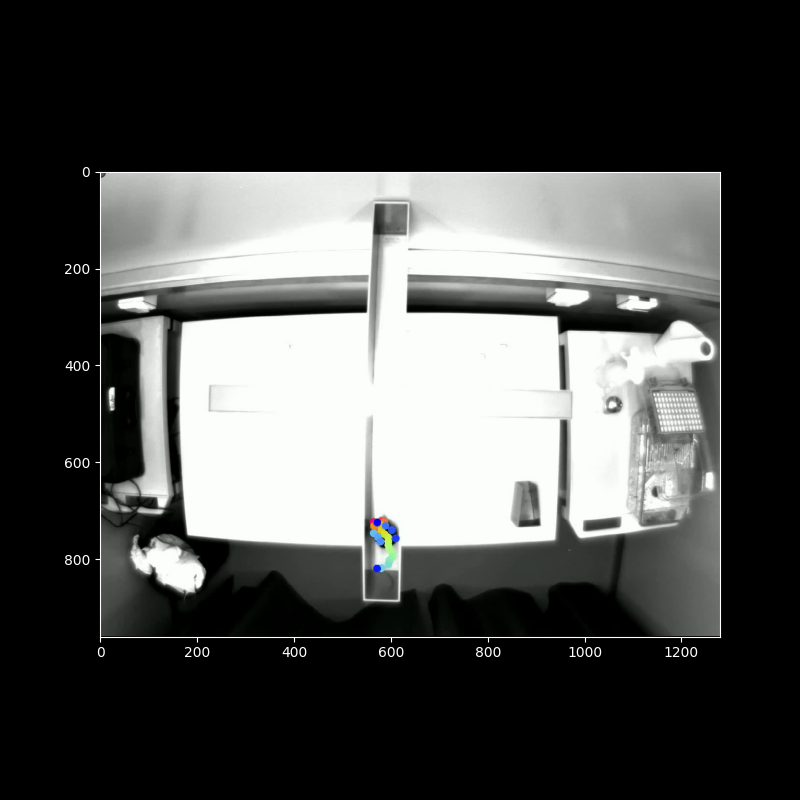

In [10]:
behavior_analysis = amadeus.get_behavior_analysis('../examples/EPM/EPM_11.mp4') #check the path!
behavior_analysis.gui_manager.add_roi_from_video_selection()

### Get video clips, ethogram and trajectory plots for mouse in the ROI 0

In [11]:
query = "When is the mouse in ROI0"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0218 $
current input tokens 2779
current accumulated tokens 3938


To determine when the mouse is in `ROI0`, we need to capture events where the mouse overlaps with the region of interest (ROI0). We can use the `get_animals_object_events` function from the `AnimalBehaviorAnalysis` class to achieve this. This function allows us to specify the object of interest (in this case, `ROI0`) and query for overlap events.

Let's write the code to capture these events.

### You can get a list of binary masks (equivalent to ethogram) for the underlying behavior, if your query is about retriving a described behavior

In [12]:
# the return masks is of shape (num_of_events, video_length)
# where each boolean array of (video_length,) is binary where True indicates whether the behavior is happening at that frame
masks = qa_message.get_masks()
print (masks)

{<amadeusgpt.behavior_analysis.identifier.Identifier object at 0x17ee43ad0>: None}


In [13]:
query = "Plot the trajectory of the animal using the animal center and color it by time"
qa_message = amadeus.step(query)
qa_message = parse_result(amadeus, qa_message)

INFO:httpx:HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
INFO:httpx:HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


current total cost 0.0384 $
current input tokens 3068
current accumulated tokens 7092


To plot the trajectory of the animal using the animal center and color it by time, we can follow these steps:

1. Retrieve the keypoints data using the `get_keypoints` function.
2. Identify the index of the `mouse_center` keypoint.
3. Extract the trajectory of the `mouse_center` keypoint.
4. Plot the trajectory and color it by time.

Let's write the code to achieve this.

### How to retrieve results using the query

In [14]:
messages = amadeus.get_messages()

for query, qa_message in messages.items():
    print (query)
    print (qa_message.get_masks())

When is the mouse in ROI0
{<amadeusgpt.behavior_analysis.identifier.Identifier object at 0x17ee43ad0>: None}
Plot the trajectory of the animal using the animal center and color it by time
{<amadeusgpt.behavior_analysis.identifier.Identifier object at 0x17d681580>: None}
